In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
playlists = []
songs_counter = {}

track_uri_to_track_name = {}
track_uri_to_artist_name = {}
track_uri_to_album_name = {}

for file in os.listdir('data/raw_data'):
    json_file = open(f'data/raw_data/{file}', 'r')
    data = json.load(json_file)
    _playlists = data['playlists']

    for playlist in _playlists:
        _playlist = []
        for song in playlist['tracks']:
            track_uri = song['track_uri']

            track_name = song['track_name']
            artist_name = song['artist_name']
            album_name = song['album_name']

            if track_uri not in track_uri_to_track_name:
                track_uri_to_track_name[track_uri] = track_name
                track_uri_to_artist_name[track_uri] = artist_name
                track_uri_to_album_name[track_uri] = album_name

            if track_uri not in songs_counter:
                songs_counter[track_uri] = 1
            else:
                songs_counter[track_uri] += 1

            _playlist.append(track_uri)

        playlists.append(_playlist)

playlists[:3]

# TIME: 6 minutes

[['spotify:track:0UaMYEvWZi0ZqiDOoHU3YI',
  'spotify:track:6I9VzXrHxO9rA9A5euc8Ak',
  'spotify:track:0WqIKmW4BTrj3eJFmnCKMv',
  'spotify:track:1AWQoqb9bSvzTjaLralEkT',
  'spotify:track:1lzr43nnXAijIGYnCT8M8H',
  'spotify:track:0XUfyU2QviPAs6bxSpXYG4',
  'spotify:track:68vgtRHr7iZHpzGpon6Jlo',
  'spotify:track:3BxWKCI06eQ5Od8TY2JBeA',
  'spotify:track:7H6ev70Weq6DdpZyyTmUXk',
  'spotify:track:2PpruBYCo4H7WOBJ7Q2EwM',
  'spotify:track:2gam98EZKrF9XuOkU13ApN',
  'spotify:track:4Y45aqo9QMa57rDsAJv40A',
  'spotify:track:1HwpWwa6bnqqRhK8agG4RS',
  'spotify:track:20ORwCJusz4KS2PbTPVNKo',
  'spotify:track:7k6IzwMGpxnRghE7YosnXT',
  'spotify:track:1Bv0Yl01xBDZD4OQP93fyl',
  'spotify:track:4omisSlTk6Dsq2iQD7MA07',
  'spotify:track:7xYnUQigPoIDAMPVK79NEq',
  'spotify:track:6d8A5sAx9TfdeseDvfWNHd',
  'spotify:track:4pmc2AxSEq6g7hPVlJCPyP',
  'spotify:track:215JYyyUnrJ98NK3KEwu6d',
  'spotify:track:0uqPG793dkDDN7sCUJJIVC',
  'spotify:track:19Js5ypV6JKn4DMExHQbGc',
  'spotify:track:1JURww012QnWAw0zZ

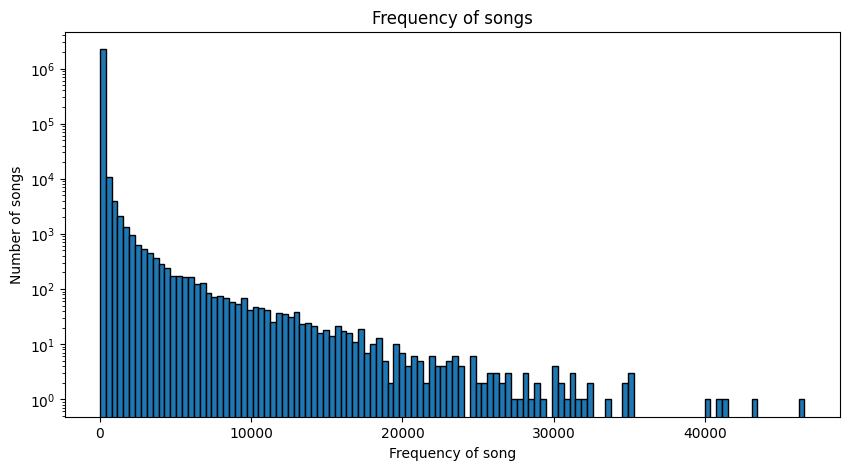

In [3]:
plt.figure(figsize=(10, 5))
plt.hist(songs_counter.values(), bins=120, edgecolor='black')
plt.xlabel('Frequency of song')
plt.ylabel('Number of songs')
plt.title('Frequency of songs')
#log y
plt.yscale('log')

plt.show()


In [4]:
for i in range(16):
    min_freq = 2 ** i
    num_of_songs = len([song for song in songs_counter.values() if song >= min_freq])
    print(f'Number of songs that appear {min_freq} times or more: {num_of_songs}')

print(f'Total number of songs: {len(songs_counter)}')
print("\n")

num_of_songs = len([song for song in songs_counter.values() if song >= 50])
print(f'Number of songs that appear 50 times or more: {num_of_songs}')


Number of songs that appear 1 times or more: 2262292
Number of songs that appear 2 times or more: 1188873
Number of songs that appear 4 times or more: 701775
Number of songs that appear 8 times or more: 434094
Number of songs that appear 16 times or more: 268851
Number of songs that appear 32 times or more: 164523
Number of songs that appear 64 times or more: 98429
Number of songs that appear 128 times or more: 57984
Number of songs that appear 256 times or more: 33346
Number of songs that appear 512 times or more: 18651
Number of songs that appear 1024 times or more: 10128
Number of songs that appear 2048 times or more: 5226
Number of songs that appear 4096 times or more: 2462
Number of songs that appear 8192 times or more: 942
Number of songs that appear 16384 times or more: 197
Number of songs that appear 32768 times or more: 11
Total number of songs: 2262292


Number of songs that appear 50 times or more: 118512


In [5]:
id_to_uri = {}
uri_to_id = {}

playlists_pruned = []
for original_playlist in playlists:
    new_playlist = []

    for song in original_playlist:
        if(songs_counter[song] < 50):
            continue

        if song not in uri_to_id:

            uri_to_id[song] = len(uri_to_id)
            id_to_uri[len(uri_to_id)] = song
        
        new_playlist.append(uri_to_id[song])

    if len(new_playlist) > 2:
        playlists_pruned.append(new_playlist)

playlists_pruned[:3]

In [ ]:
# prune track_uri_to_track_name, track_uri_to_artist_name, track_uri_to_album_name
track_uri_to_track_name = { key: value for key, value in track_uri_to_track_name.items() if key in uri_to_id }
track_uri_to_artist_name = { key: value for key, value in track_uri_to_artist_name.items() if key in uri_to_id }
track_uri_to_album_name = { key: value for key, value in track_uri_to_album_name.items() if key in uri_to_id }

In [ ]:
# save the relevant data

with open('data/processed_data/playlists.json', 'w') as f:
    json.dump(playlists_pruned, f)

with open('data/processed_data/track_uri_to_track_name.json', 'w') as f:
    json.dump(track_uri_to_track_name, f)

with open('data/processed_data/track_uri_to_artist_name.json', 'w') as f:
    json.dump(track_uri_to_artist_name, f)

with open('data/processed_data/track_uri_to_album_name.json', 'w') as f:
    json.dump(track_uri_to_album_name, f)

with open('data/processed_data/id_to_uri.json', 'w') as f:
    json.dump(id_to_uri, f)

with open('data/processed_data/uri_to_id.json', 'w') as f:
    json.dump(uri_to_id, f)

print('Data saved successfully')

Data saved successfully


In [ ]:
sizes_of_playlists = [len(playlist) for playlist in playlists_pruned]
plt.figure(figsize=(10, 5))
plt.hist(sizes_of_playlists, bins=100, edgecolor='black')
plt.xlabel('Number of songs')
plt.ylabel('Number of playlists')
plt.title('Number of songs in playlists')
plt.show()

NameError: name 'playlists_pruned' is not defined

In [ ]:
songs_count = {}
for playlist in playlists_pruned:
    for song in playlist:
        if song not in songs_count:
            songs_count[song] = 1
        else:
            songs_count[song] += 1

plt.figure(figsize=(10, 5))
plt.hist(songs_count.values(), bins=100, edgecolor='black')
plt.xlabel('Frequency of song')
plt.ylabel('Number of songs')
plt.title('Frequency of songs')
plt.show()

In [ ]:
print(f"Number of playlists: {len(playlists_pruned)}")
print(f"Number of songs: {len(songs_count)}")

